<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/Seminar8_boostings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Градиентный бустинг**


Catboost vs. LightGBM vs. XGBoost

Сравнение моделей на искусственном примере

CatBoost для решения задачи

Интерпретация модели

Блендинг и стекинг

In [68]:
!pip install catboost==1.0.3
!pip install lightgbm==3.2.1
!pip install cmake==3.22.0
!pip install xgboost==1.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import warnings 
warnings.filterwarnings('ignore')

In [54]:
import catboost
import lightgbm
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize'] = (8,6)

In [55]:
def plot_surface(X, y, clf):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график сами наблюдения
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=241)

0.919452347083926

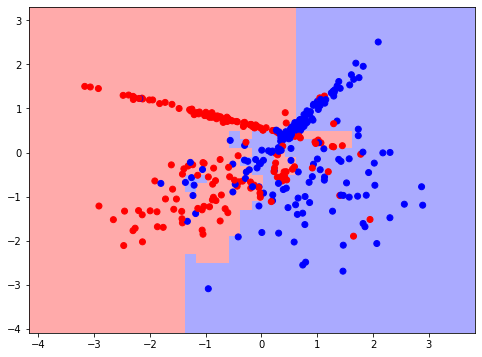

In [56]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(n_estimators=300, logging_level='Silent')
cbc.fit(X_train, y_train)
plot_surface(X_train, y_train, cbc)

roc_auc_score(y_test, cbc.predict_proba(X_test)[:,1])

In [57]:
cbc.predict_proba(X_test)

array([[0.96839004, 0.03160996],
       [0.02480728, 0.97519272],
       [0.86387945, 0.13612055],
       [0.49645731, 0.50354269],
       [0.97576962, 0.02423038],
       [0.94031508, 0.05968492],
       [0.99318609, 0.00681391],
       [0.4183503 , 0.5816497 ],
       [0.58598249, 0.41401751],
       [0.3097317 , 0.6902683 ],
       [0.0843928 , 0.9156072 ],
       [0.13218996, 0.86781004],
       [0.91318037, 0.08681963],
       [0.16473895, 0.83526105],
       [0.09332802, 0.90667198],
       [0.03950029, 0.96049971],
       [0.06744456, 0.93255544],
       [0.96988492, 0.03011508],
       [0.99126761, 0.00873239],
       [0.87434929, 0.12565071],
       [0.91355818, 0.08644182],
       [0.08843389, 0.91156611],
       [0.05798313, 0.94201687],
       [0.40602606, 0.59397394],
       [0.07560501, 0.92439499],
       [0.93196611, 0.06803389],
       [0.13452539, 0.86547461],
       [0.20814344, 0.79185656],
       [0.91783808, 0.08216192],
       [0.06838947, 0.93161053],
       [0.

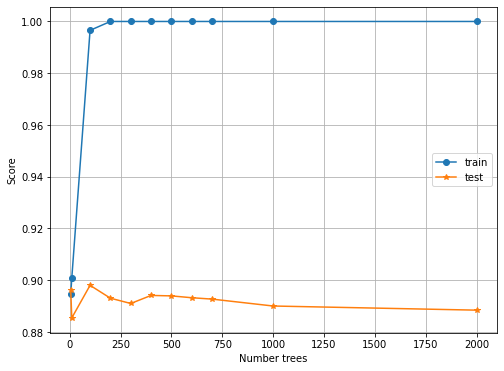

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
n_estimator = [5,10,100, 200,300,400,500,600,700,1000,2000]
qual_train = []
qual_test = []
for i in n_estimator:
    catboost = GradientBoostingClassifier(n_estimators=i)
    catboost.fit(X_train, y_train)
    q_train = roc_auc_score(y_train, catboost.predict_proba(X_train)[:,1])
    q_test = roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])
    qual_train.append(q_train)
    qual_test.append(q_test)

plt.grid()
plt.plot(n_estimator, qual_train,marker='o', label='train')
plt.plot(n_estimator, qual_test,marker='*', label='test')
plt.xlabel('Number trees')
plt.ylabel('Score')
plt.legend()
plt.show()

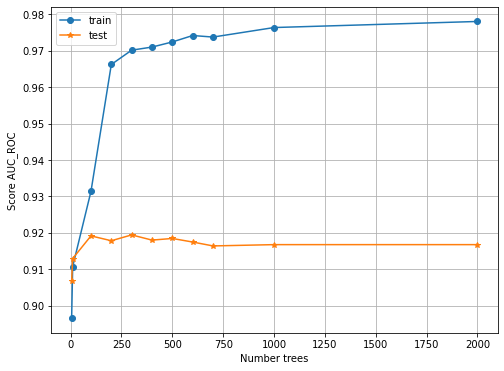

In [59]:
n_estimator = [5,10,100, 200,300,400,500,600,700,1000,2000]
qual_train = []
qual_test = []
for i in n_estimator:
    catboost = CatBoostClassifier(iterations=i, logging_level='Silent')
    catboost.fit(X_train, y_train)
    q_train = roc_auc_score(y_train, catboost.predict_proba(X_train)[:,1])
    q_test = roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])
    qual_train.append(q_train)
    qual_test.append(q_test)

plt.grid()
plt.plot(n_estimator, qual_train,marker='o', label='train')
plt.plot(n_estimator, qual_test,marker='*', label='test')
plt.xlabel('Number trees')
plt.ylabel('Score AUC_ROC')
plt.legend()
plt.show()

0.8745554765291608

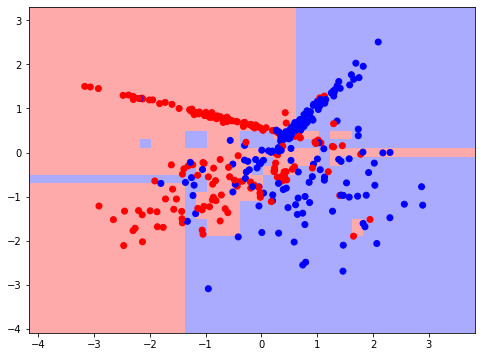

In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, verbosity=0)
xgb.fit(X_train, y_train)

plot_surface(X_train, y_train, xgb)
roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

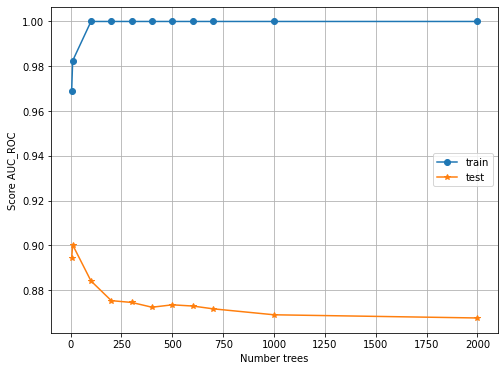

In [61]:
n_estimator = [5,10,100, 200,300,400,500,600,700,1000,2000]
qual_train = []
qual_test = []
for i in n_estimator:
    catboost = XGBClassifier(n_estimators=i, logging_level='Silent')
    catboost.fit(X_train, y_train)
    q_train = roc_auc_score(y_train, catboost.predict_proba(X_train)[:,1])
    q_test = roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])
    qual_train.append(q_train)
    qual_test.append(q_test)

plt.grid()
plt.plot(n_estimator, qual_train,marker='o', label='train')
plt.plot(n_estimator, qual_test,marker='*', label='test')
plt.xlabel('Number trees')
plt.ylabel('Score AUC_ROC')
plt.legend()
plt.show()

0.8733108108108107

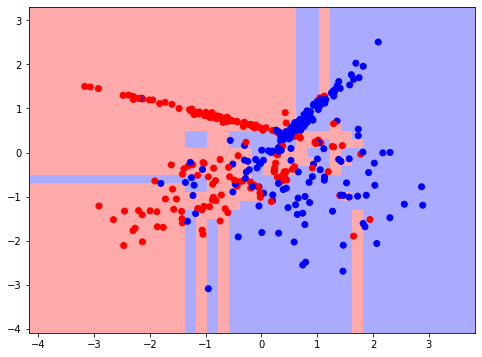

In [62]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=300)
lgbm.fit(X_train, y_train)

plot_surface(X_train, y_train, lgbm)
roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])

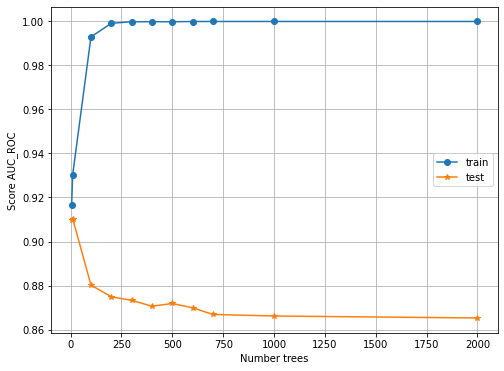

In [63]:
n_estimator = [5,10,100, 200,300,400,500,600,700,1000,2000]
qual_train = []
qual_test = []
for i in n_estimator:
    catboost = LGBMClassifier(n_estimators=i)
    catboost.fit(X_train, y_train)
    q_train = roc_auc_score(y_train, catboost.predict_proba(X_train)[:,1])
    q_test = roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])
    qual_train.append(q_train)
    qual_test.append(q_test)

plt.grid()
plt.plot(n_estimator, qual_train,marker='o', label='train')
plt.plot(n_estimator, qual_test,marker='*', label='test')
plt.xlabel('Number trees')
plt.ylabel('Score AUC_ROC')
plt.legend()
plt.show()

In [64]:
def plot_model_diff_depths(model=LGBMClassifier, depth_range=list(range(1, 5)), n_trees=10):
    roc_auc_train = []
    roc_auc_test = []
    for i in depth_range:
        clf = model(n_estimators=n_trees, max_depth=i)
        if type(clf) == type(CatBoostClassifier()):
            clf = CatBoostClassifier(n_estimators=n_trees, max_depth=i, logging_level="Silent")
        clf.fit(X_train, y_train)
        q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
        q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        roc_auc_train.append(q_train)
        roc_auc_test.append(q_test)

    plt.figure(figsize=(7, 5))
    plt.plot(depth_range, roc_auc_train, marker='o', label='train')
    plt.plot(depth_range, roc_auc_test, marker='o', label='test')
    plt.title(f'{model}')
    plt.xlabel('Depth')
    plt.ylabel('AUC-ROC')
    plt.legend()

    plt.show()

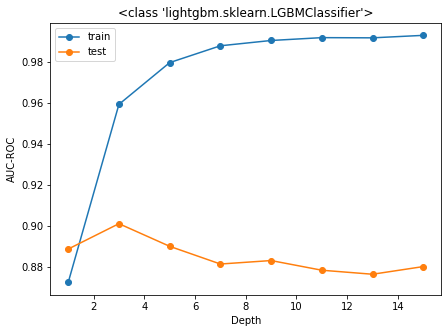

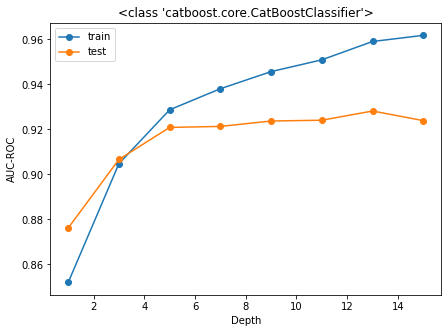

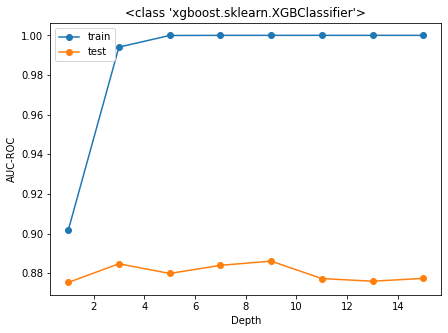

In [65]:
plot_model_diff_depths(model=LGBMClassifier, depth_range=list(range(1, 16, 2)), n_trees=100)
plot_model_diff_depths(model=CatBoostClassifier, depth_range=list(range(1, 16, 2)), n_trees=100)
plot_model_diff_depths(model=XGBClassifier, depth_range=list(range(1, 16, 2)), n_trees=100)

In [70]:
from sklearn.datasets import load_boston

In [71]:
data = load_boston()
X_init = pd.DataFrame(data.data, columns=data.feature_names)
y_init = data.target

X, X_test, y, y_test = train_test_split(X_init, y_init, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_init, y_init, test_size=0.3, random_state=42)

assert X_init.shape[0] == X_train.shape[0] + X_val.shape[0]

In [72]:
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [74]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

In [75]:
gb = CatBoostRegressor(iterations=100, max_depth=4, learning_rate=0.01, loss_function='RMSE', logging_level='Silent')
gb.fit(X_train, y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)

meta_train_df = pd.DataFrame()
meta_train_df['gb_preds'] = gb.predict(X_val)
meta_train_df['lr_preds'] = lr.predict(X_val)

meta_algo = LGBMRegressor()
meta_algo.fit(meta_train_df, y_val)

meta_pred_df = pd.DataFrame()
meta_pred_df['gb_preds'] = gb.predict(X_test)
meta_pred_df['lr_preds'] = lr.predict(X_test)
test_preds_meta = meta_algo.predict(meta_pred_df)

rmse(y_test, test_preds_meta)

3.9842806744462944

STACKING

In [76]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

estimators = [('rf', RandomForestRegressor(n_estimators=200,random_state=42)),
              ('lr', LinearRegression(),
               'knn',KNeighborsClassifier(n_neighbors=10))]

reg = StackingRegressor(estimators=estimators,
                        cv=10,
                        final_estimator=CatBoostRegressor(iterations=700, max_depth=5, learning_rate=0.01, 
                                       loss_function='RMSE', logging_level='Silent'))

reg.fit(X_train, y_train).score(X_test, y_test)
reg_preds = reg.predict(X_test)
round(rmse(y_test, reg_preds), 3)

3.095